<a href="https://colab.research.google.com/github/gioguarnieri/Materias_Doutorado_INPE/blob/main/Estat%C3%ADstica_Computacional/Exerc%C3%ADcio_4_Giovanni_Guarnieri_Soares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4 from Computational Statistics Class
Name: Giovanni Guarnieri Soares

Lecturer: Valdivino Alexandre de Santiago Júnior

## Importing Libraries

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
from google.colab import files
import plotly.express as px

## Importing figures to a list

In [186]:
import glob
images = [imread(file, as_gray=False) for file in glob.glob("/content/Images/*.JPEG")] # with colors
images_bw = [imread(file, as_gray=True) for file in glob.glob("/content/Images/*.JPEG")] # Black and white

### Testing

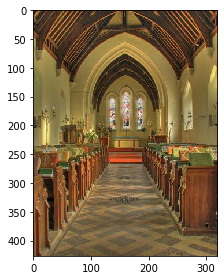

In [187]:
imshow(images[0])

## Processing figures

Here we calculate the mean color to each figure, the horizontal and vertical edges.

In [188]:
X = []
mean_color = []
mean_edge_h = []
mean_edge_v = []
for i in range(len(images)):
  x = images[i].mean()/255
  y = prewitt_h(images_bw[i]).mean()
  # X.append([r[-1], g[-1], b[-1]])
  X.append([x, y])
  mean_color.append(x)
  mean_edge_h.append(y)
  mean_edge_v.append(prewitt_v(images_bw[i]).mean())

df = pd.DataFrame()
df["images"] = images
df["h_edges_mean"] = mean_edge_h
df["v_edges_mean"] = mean_edge_v
df["mean_color"] = mean_color

## Fitting the GMM

In [189]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6).fit(X)
labels = gmm.predict(X)
df["labels"] = labels

### Final Dataframe

In [190]:
df

,images,h_edges_mean,v_edges_mean,mean_color,labels
0,"[[[84, 107, 61], [86, 87, 56], [80, 55, 50], [...",0.000530,0.000284,0.349367,0
1,"[[[162, 83, 14], [151, 78, 10], [141, 75, 15],...",-0.000056,-0.000296,0.394332,0
2,"[[[195, 187, 185], [176, 168, 166], [173, 164,...",-0.002169,0.000572,0.468350,4
3,"[[[9, 5, 6], [9, 5, 6], [9, 5, 6], [9, 5, 6], ...",-0.000004,-0.000239,0.311436,0
4,"[[[186, 189, 194], [186, 189, 194], [187, 190,...",0.000222,-0.000180,0.488886,4
...,...,...,...,...,...
595,"[[[167, 168, 162], [189, 190, 184], [197, 198,...",-0.000754,-0.000010,0.442005,4
596,"[[[35, 89, 161], [35, 89, 161], [35, 89, 161],...",0.000416,0.000233,0.435316,4
597,"[[[194, 184, 183], [220, 210, 209], [228, 218,...",-0.000558,-0.000807,0.472205,4
598,"[[[5, 4, 2], [5, 4, 2], [5, 4, 2], [5, 4, 2], ...",0.000278,0.000261,0.192356,3


1. Present the components based on this dataset. Use Gaussian Mixture Models (GMMs) to solve this item;


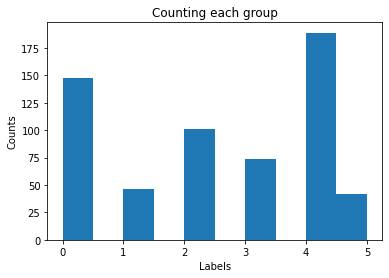

In [191]:
plt.figure()
plt.hist(df["labels"])
plt.xlabel("Labels")
plt.ylabel("Counts")
plt.title("Counting each group")
plt.show()

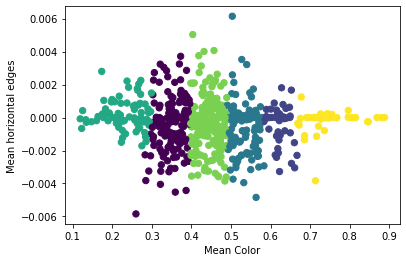

In [192]:
plt.figure()
plt.scatter(df["mean_color"], df["h_edges_mean"], c=labels, s=40, cmap='viridis')
plt.xlabel("Mean Color")
plt.ylabel("Mean horizontal edges")
plt.show()

## Mean color interval of each component

2. Estimate the probability density function for each component you have found in the previous item. Show the plots. What is the best bandwidth in this case?


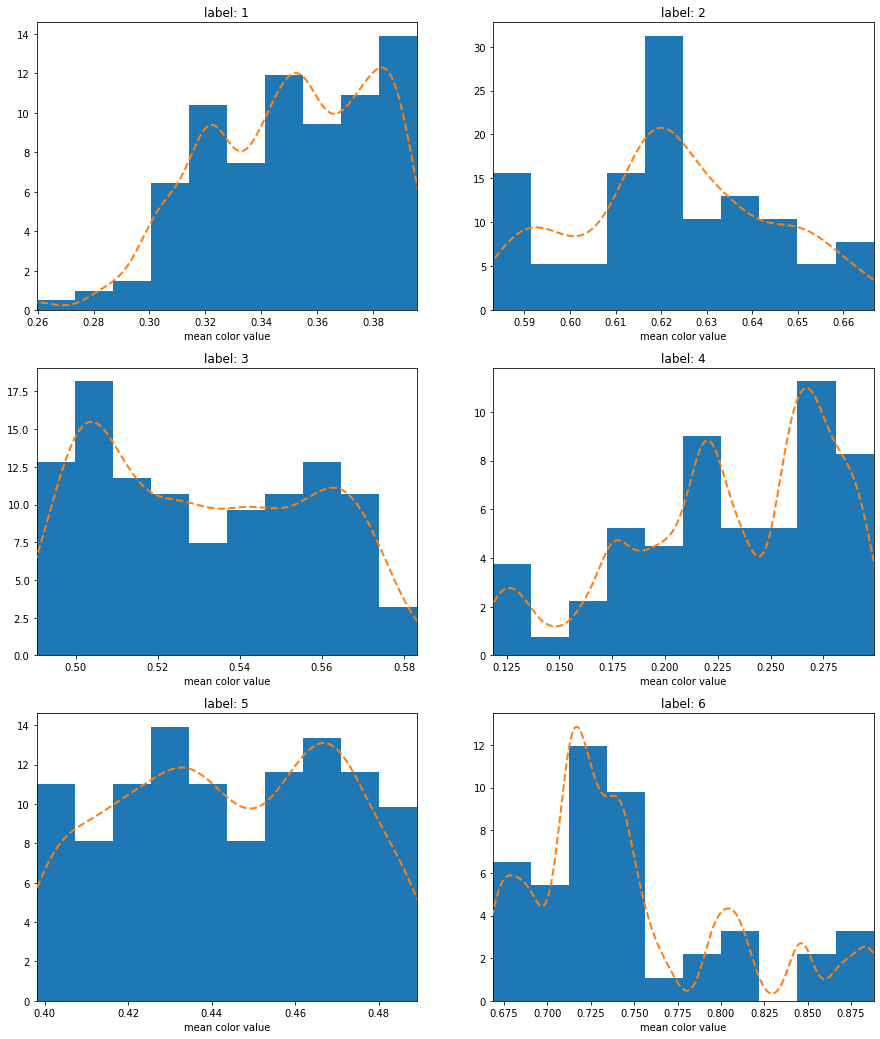

In [193]:
components = 6
plt.figure(figsize=(15, 18))
for n in range(components):
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, n + 1)
    ax.hist(df[df["labels"] == n]["mean_color"], density = True)
    # chart formatting
    ax.set_title(f"label: {n+1}")
    ax.set_xlabel("mean color value")
    # Plot the KDE for various bandwidths
    kde = sm.nonparametric.KDEUnivariate(df[df["labels"] == n]["mean_color"])
    kde.fit()  # Estimate the densities
    ax.set_xlim([min(df[df["labels"] == n]["mean_color"]), max(df[df["labels"] == n]["mean_color"])])
    kde.fit(bw=0.007)  # Estimate the densities
    ax.plot(
        kde.support,
        kde.density,
        "--",
        lw=2,
        zorder=10,
    )


plt.show()
# plt.hist(df[df["labels"] == 5]["mean_color"])

Best bandwidth: 0.007

## Mean horizontal edges interval of each component

Dividing the mean horizontal edges in intervals to each component in the dataset

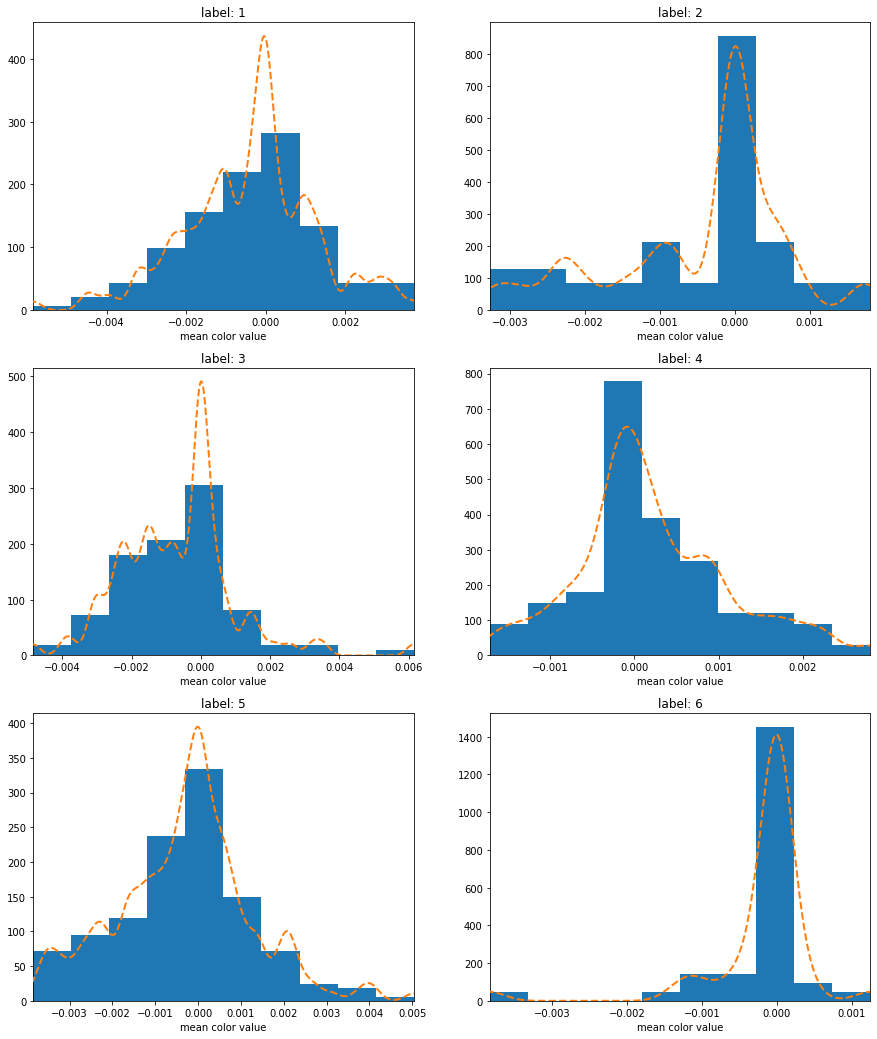

In [194]:
components = 6
plt.figure(figsize=(15, 18))
for n in range(components):
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, n + 1)
    ax.hist(df[df["labels"] == n]["h_edges_mean"], density = True)
    # chart formatting
    ax.set_title(f"label: {n+1}")
    ax.set_xlabel("mean color value")
    # Plot the KDE for various bandwidths
    kde = sm.nonparametric.KDEUnivariate(df[df["labels"] == n]["h_edges_mean"])
    kde.fit()  # Estimate the densities
    ax.set_xlim([min(df[df["labels"] == n]["h_edges_mean"]), max(df[df["labels"] == n]["h_edges_mean"])])
    kde.fit(bw=0.0002)  # Estimate the densities
    ax.plot(
        kde.support,
        kde.density,
        "--",
        lw=2,
        zorder=10,
        label="KDE from samples, bw = 0.002",
    )


plt.show()
# plt.hist(df[df["labels"] == 5]["mean_color"])

best bandwidth: 0.0002

## Histograms to the entire dataset of the mean color value.

3. Estimate the probability density function for the entire dataset. Show the plot. What is the best bandwidth in this case?


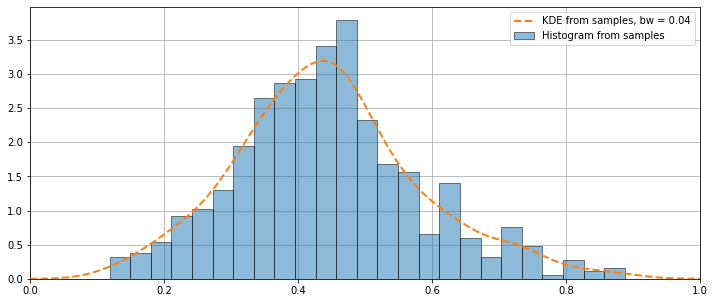

In [196]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
kde = sm.nonparametric.KDEUnivariate(df["mean_color"])
kde.fit()  # Estimate the densities
# Plot the histrogram
ax.hist(
    mean_color,
    bins=25,
    label="Histogram from samples",
    zorder=5,
    edgecolor="k",
    density=True,
    alpha=0.5,
)

# Plot the KDE for various bandwidths
my_colors = ['b', 'g', 'k', 'm']
bandwidth = [0.04]
kde.fit(bw=0.04)  # Estimate the densities
ax.plot(
    kde.support,
    kde.density,
    "--",
    lw=2,
    zorder=10,
    label="KDE from samples, bw = 0.04",
)



ax.legend(loc="best")
ax.set_xlim([0, 1])
ax.grid(True, zorder=-5)

best bandwidth: 0.04


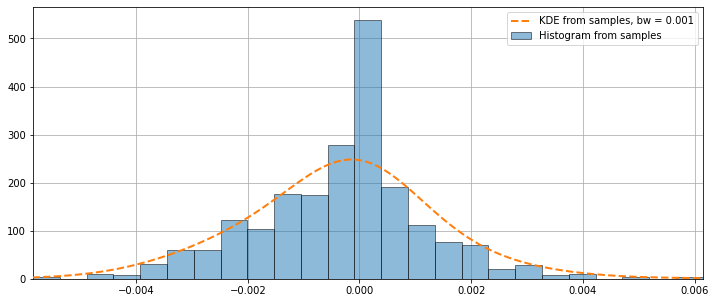

In [197]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
kde = sm.nonparametric.KDEUnivariate(df["h_edges_mean"])
kde.fit()  # Estimate the densities
# Plot the histrogram
ax.hist(
    df["h_edges_mean"],
    bins=25,
    label="Histogram from samples",
    zorder=5,
    edgecolor="k",
    density=True,
    alpha=0.5,
)

# Plot the KDE for various bandwidths
kde.fit(bw=0.001)  # Estimate the densities
ax.plot(
    kde.support,
    kde.density,
    "--",
    lw=2,
    zorder=10,
    label="KDE from samples, bw = 0.001",
)



ax.legend(loc="best")
ax.set_xlim(min(df["h_edges_mean"]), max(df["h_edges_mean"]))
ax.grid(True, zorder=-5)

best bandwidth: 0.001